# Projet

In [2]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from time import time

from numpy.linalg import eig, inv
import warnings
warnings.filterwarnings("ignore")

In [3]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

2022-01-01 16:43:33.241309: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-01 16:43:33.241338: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Classes :
|nb|name|
|--|--|
|0 |T-shirt/top|
|1 |Trouser|
|2 |Pullover|
|3 |Dress|
|4 |Coat|
|5 |Sandal|
|6 |Shirt|
|7 |Sneaker|
|8 |Bag|
|9 |Ankle boot|

In [4]:
classes = { 0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
def isA(nb: int):
  return classes[nb]

Class: Ankle boot


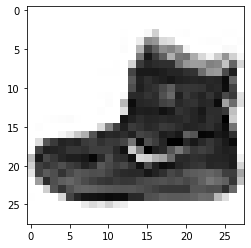

In [5]:
from matplotlib import cm
plt.imshow(X_train[0], cmap=cm.Greys)
print("Class:", isA(Y_train[0]))

On voit que l'element 0 est de la class `Ankle boot`

## 1. Test des differents algorithmes de classification

In [6]:
# Re shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

### K-nn

In [7]:
from sklearn.neighbors import KNeighborsClassifier

def executeKnn(X_train, Y_train, X_test, Y_test, k=5):
  # Create K-nn classifier
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  t = time()
  # Train the classifier
  knn.fit(X_train, Y_train)
  print("training time: ", time() - t)

  # Test the classifier
  Y_pred = knn.predict(X_test)

  print("k = {:d} : {:.2%}".format(k, accuracy_score(Y_test, Y_pred)))

On se limite à un échantillon du dataset car le K-nn était trop lent à s'exécuter

In [8]:
nbTrain = X_train.shape[0]
print("Nb train", nbTrain)
nbTest = X_test.shape[0]
print("Nb test", nbTest)

divFactor = 8

nbTrainSample = round(nbTrain / divFactor)
print("Nb train sample", nbTrainSample)
nbTestSample = round(nbTest / divFactor)
print("Nb test sample", nbTestSample)

X_train_sample = X_train[:nbTrainSample]
Y_train_sample = Y_train[:nbTrainSample]
X_test_sample = X_test[:nbTestSample]
Y_test_sample = Y_test[:nbTestSample]

Nb train 60000
Nb test 10000
Nb train sample 7500
Nb test sample 1250


In [8]:
for k in range (1, 6):
  executeKnn(X_train_sample, Y_train_sample, X_test_sample, Y_test_sample, k)

training time:  0.5710036754608154
k = 1 : 79.28%
training time:  0.5431709289550781
k = 2 : 80.64%
training time:  0.5408463478088379
k = 3 : 80.80%
training time:  0.5455806255340576
k = 4 : 80.88%
training time:  0.5360336303710938
k = 5 : 82.24%


### Classifieur bayésien

In [9]:
from sklearn.naive_bayes import GaussianNB

def executeBayes(X_train, Y_train, X_test, Y_test):
  # Create ML classifier
  knn = GaussianNB()
  t = time()
  # Train the classifier
  knn.fit(X_train, Y_train)
  print("training time: ", time() - t)

  # Test the classifier
  Y_pred = knn.predict(X_test)

  print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

In [10]:
executeBayes(X_train, Y_train, X_test, Y_test)

training time:  0.7100265026092529
58.56%


### Arbre de décision

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

def displayTree(dt, features_cols, class_names):
  dot_data = StringIO()
  export_graphviz(dt, out_file=dot_data,
                  filled=True, rounded=True,
                  special_characters=True,feature_names = features_cols,class_names=class_names)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('fashion.png')
  Image(graph.create_png())

In [11]:
from sklearn.tree import DecisionTreeClassifier

def executeDecisionTree(X_train, Y_train, X_test, Y_test, display=False):
  # Create Decision Tree classifier
  dt = DecisionTreeClassifier(criterion='entropy')
  t = time()
  # Train the classifier
  dt.fit(X_train, Y_train)
  print("training time: ", time() - t)

  if display:
    features_cols = [str(k) for k in range(X_train.shape[1])]
    class_names = [str(k) for k in classes.keys()]
    displayTree(dt, features_cols, class_names)

  # Test the classifier
  Y_pred = dt.predict(X_test)

  print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

In [13]:
executeDecisionTree(X_train, Y_train, X_test, Y_test)

training time:  34.88049650192261
80.36%


On a trop de données donc l'arbre de décision est trop grand pour être affiché

On cherche les meilleurs paramètres.

In [14]:
if False:
  criterion = ['gini', 'entropy']
  max_depth = [3, 5, 10]
  min_samples_leaf = [1, 2, 5]
  min_samples_split = [2, 3, 4]

  best_params = None
  best_score = 0
  for c in criterion:
      for depth in max_depth:
          for l in min_samples_leaf:
              for s in min_samples_split:
                  dt = DecisionTreeClassifier(criterion=c, max_depth=depth, min_samples_leaf=l, min_samples_split=s)
                  dt.fit(X_train, Y_train)
                  y_pred = dt.predict(X_test)
                  scores = accuracy_score(Y_test, y_pred)
                  if best_score==0 or scores > best_score:
                      best_score = scores
                      best_params = [c, depth, l, s]

  print('Best Accuracy: ','{:2.2%}'.format(best_score))
  print('Parameters: ', best_params)

Best Accuracy:  81.17%
Parameters:  ['entropy', 10, 1, 4]


### Forêts aléatoires

In [19]:
from sklearn.ensemble import RandomForestClassifier

def executeRandomForest(X_train, Y_train, X_test, Y_test):
  # Create Random Forest classifier
  rf = RandomForestClassifier()
  t = time()
  # Train the classifier
  rf.fit(X_train, Y_train)
  print("training time: ", time() - t)

  # Test the classifier
  Y_pred = rf.predict(X_test)

  print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

In [20]:
executeRandomForest(X_train, Y_train, X_test, Y_test)

training time:  86.60316777229309
87.29%


On cherche les meilleurs paramètres.

In [21]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 10, None], 'min_samples_split': [1, 2, 5], 'min_samples_leaf': [2, 3, 4], 'bootstrap': [True, False]}


In [24]:
if False:
  rf = RandomForestClassifier()
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                                cv = 3, verbose=2, random_state=42, n_jobs = -1)
  t = time()

  rf_random.fit(X_train_sample, Y_train_sample)
  print("training time: ", time() - t)

  Y_pred = rf.predict(X_test_sample)
  print("{:.2%}".format(accuracy_score(Y_test_sample, Y_pred)))
  rf_random.best_params_

On voit que l'accuracy de K-NN, Random forest et Decision tree tourne autour de 80%. Donc ces algorithmes sont efficaces par rapport à Bayes qui n'a qu'une accuracy à 60%.

## 2. Comparaison des technique de reduction de dimension

### Evaluation de l'imcate de la redution `ACP`2020342

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doPCA(X, nbComponents=None, display=False):
  # StandardScaler removes the mean and scales to the unit variance
  scaler = StandardScaler()
  z = scaler.fit_transform(X)

  # Do the PCA reduction
  acp = PCA(nbComponents)
  X_acp = acp.fit_transform(z)

  print(acp.n_components_)
  print(acp.explained_variance_ratio_.sum())

  if display:
    plt.grid()
    plt.plot(np.arange(1, acp.n_components_+1),acp.explained_variance_ratio_)
    plt.ylabel("Eigen values")
    plt.xlabel("Factor number")
    plt.xlim([0, 20])
    plt.show()

  return X_acp

In [109]:
# Merge data
X = np.concatenate([X_train, X_test])
print(X.shape)
X

(70000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

784
1.0000000000000002


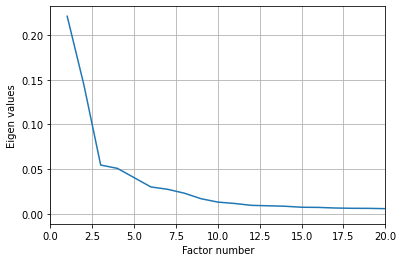

array([[-8.24695128e-01,  2.08626045e+01, -1.29060470e+01, ...,
        -1.09710294e-01, -1.51331698e-02,  4.88783375e-02],
       [ 1.70733898e+01, -4.96621704e+00, -2.00699267e+00, ...,
         1.52411750e-02, -1.20782039e-02, -3.00088460e-03],
       [-9.60003596e+00, -1.23219278e+01,  1.11963308e+00, ...,
         3.43797361e-03,  1.11448033e-02,  1.35217906e-02],
       ...,
       [-6.99353047e+00, -8.48864653e+00,  3.95530544e-01, ...,
         6.82168794e-02,  1.12211400e-02, -1.06401132e-02],
       [-2.89228540e+00, -1.53764669e+01, -7.59981403e+00, ...,
        -6.76469957e-03, -1.63065434e-02, -1.38673547e-02],
       [-1.75322476e+01,  1.24833183e-01,  3.25432528e+00, ...,
        -7.24656788e-03,  5.06611536e-02, -3.78014431e-02]])

In [110]:
# elbow criterion
X_acp = doPCA(X, None, True)

In [111]:
X_acp = doPCA(X, 3)
X_train_acp = X_acp[:nbTrain]
X_test_acp = X_acp[nbTrain:]

3
0.4195832834270295


In [112]:
#Execution of K-nn on reduced data
for k in range (1, 6):
  executeKnn(X_train_acp, Y_train, X_test_acp, Y_test, k)

training time:  0.0463106632232666
k = 1 : 56.89%
training time:  0.04699516296386719
k = 2 : 56.98%
training time:  0.04682183265686035
k = 3 : 60.10%
training time:  0.033620595932006836
k = 4 : 60.98%
training time:  0.03473615646362305
k = 5 : 62.09%


Compare avec avec l'execution de k-nn sans reduction :
- si c'est faisable
- si c'est plus efficatce (best acc)
- si c'est long sa mere

In [113]:
#Execution bayes sur les donner reduites

Compare avec avec l'execution de bayes sans reduction :

In [114]:
#Execution tree sur les donner reduites

Compare avec avec l'execution de tree sans reduction :

In [115]:
#Execution forest sur les donner reduites

Compare avec avec l'execution de forest sans reduction :

### Evaluation de l'imcate de la redution `LDA`

In [116]:
# reduction lda

In [117]:
#Execution K-nn sur les donner reduites

Compare avec avec l'execution de k-nn sans reduction :
- si c'est faisable
- si c'est plus efficatce (best acc)
- si c'est long sa mere

In [118]:
#Execution bayes sur les donner reduites

Compare avec avec l'execution de bayes sans reduction :

In [119]:
#Execution tree sur les donner reduites

Compare avec avec l'execution de tree sans reduction :

In [120]:
#Execution forest sur les donner reduites

Compare avec avec l'execution de forest sans reduction :

### Conclusion: